In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#import data
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
print("Data imported")

Data imported


In [3]:
#cancer.head() gives arror as it's not a df yet
cancer_dataset.keys()#it is dict

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
#cancer_dataset['DESCR']

In [5]:
cancer = pd.DataFrame(data =cancer_dataset['data'], columns= cancer_dataset['feature_names'])

In [6]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
cancer.shape

(569, 30)

The dataset is fairly large(30 columns) to apply PCA

before applying PCA, apply scaling use **MinMaxScaler** or **StandardScaler**

1. **MinMaxScaler**

    MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. MinMaxScaler is very sensitive to the presence of outliers.

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(cancer)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
mnmx_cancer = minmaxscaler.transform(cancer)

In [11]:
mnmx_cancer.shape

(569, 30)

In [12]:
type(mnmx_cancer)

numpy.ndarray

In [13]:
np.mean(mnmx_cancer)

0.23891242965570073

In [14]:
np.std(mnmx_cancer)

0.17348256525794975

2. **Standard Scaler**

    StandardScaler removes the mean and scales the data to unit variance. It cannot guarantee balanced feature scales in the presence of outliers.

In [15]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [16]:
standardscaler.fit(cancer)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
scaled_cancer = standardscaler.transform(cancer)

In [18]:
scaled_cancer.shape

(569, 30)

In [19]:
np.mean(scaled_cancer)

-6.118909323768877e-16

In [20]:
np.std(scaled_cancer)

1.0

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)
#n_components = no.of required dimensions
#Humans can visualise upto 3D data

# Applying PCA on MinMaxScaled data

In [23]:
pca.fit(mnmx_cancer)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca.explained_variance_ratio_

array([0.53097689, 0.1728349 ])

Percentage Variation [53.1 17.3]


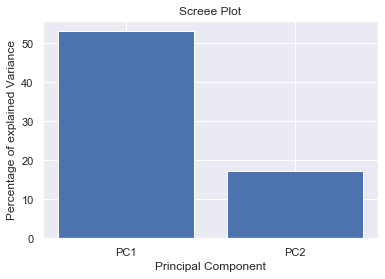

In [25]:
#The following code constructs the Scree plot
percentage_variation = np.round(pca.explained_variance_ratio_* 100, decimals =1)
print("Percentage Variation",percentage_variation)

#calculates the % of variation that each principal component accounts for.
labels = ['PC' + str(x) for x in range(1,len(percentage_variation)+1)]
#creating labels for the scree plot. 

#creating a bar plot from Matplotlib 
plt.figure(figsize = (6,4))
plt.bar(x = range(1,len(percentage_variation)+1), height = percentage_variation, tick_label = labels)
plt.ylabel('Percentage of explained Variance')
plt.xlabel('Principal Component')
plt.title('Screee Plot')
plt.show()

In [26]:
mnmx_pca = pca.transform(mnmx_cancer)

In [27]:
mnmx_pca.shape
#mnmx_pca is now 2 columns wide

(569, 2)

In [28]:
np.mean(mnmx_pca)

-3.0594546618844385e-16

In [29]:
np.std(mnmx_pca)

0.4681946286589808

## Draw a Scree plot and a PCA plot

## PCA plot

In [30]:
pca_df = pd.DataFrame(mnmx_pca,columns=labels)
#put the new coordinates created by pca.transform(mnmx_pca) 
#into a matrix where the rows have sample labels and 
#columns have PC labels
pca_df.head()

,PC1,PC2
0,1.387021,0.426895
1,0.462308,-0.556947
2,0.954621,-0.109701
3,1.000816,1.525089
4,0.626828,-0.302471


A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

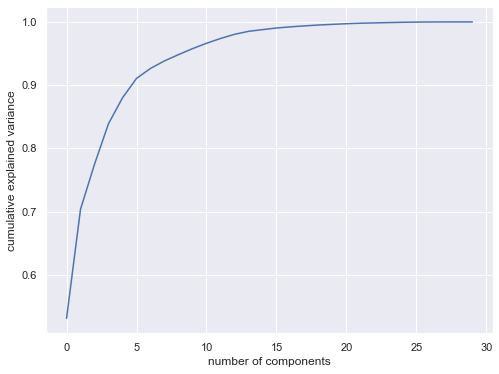

In [31]:
pca = PCA().fit(mnmx_cancer)
plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [32]:
pca.n_components_

30

In [33]:
mnmx_cancer.shape

(569, 30)

In [34]:
pca = PCA(0.9).fit(mnmx_cancer)
print(pca.n_components)
print(pca.n_components_)
print(pca.explained_variance_ratio_)

0.9
6
[0.53097689 0.1728349  0.07114442 0.06411259 0.04086072 0.03071494]


In [35]:
# Compute the components and projected faces
from sklearn.decomposition import PCA
pca = PCA(0.9).fit(mnmx_cancer)
print(pca.n_components_)
print(pca.explained_variance_ratio_)
components = pca.transform(mnmx_cancer)
# print(components)
projected = pca.inverse_transform(components)
# print(projected)
# Access components
pc_1 = pca.components_[0]
print(pc_1)
print(pc_1.shape)
pc_2 = pca.components_[1]
print(pc_2)
print(pc_2.shape)

6
[0.53097689 0.1728349  0.07114442 0.06411259 0.04086072 0.03071494]
[ 2.42675774e-01  9.64786101e-02  2.52550175e-01  2.16494530e-01
  1.09694618e-01  2.40397602e-01  3.01914206e-01  3.22475470e-01
  1.11431911e-01  4.32983397e-02  1.21760615e-01 -3.91796003e-05
  1.18580603e-01  1.03569266e-01 -4.68418094e-03  1.29319789e-01
  6.56807080e-02  1.24746120e-01  1.44902467e-02  4.55013416e-02
  2.59386850e-01  1.13833007e-01  2.60708399e-01  2.05917767e-01
  1.23773566e-01  2.04993413e-01  2.44083623e-01  3.71065064e-01
  9.59229054e-02  9.46335142e-02]
(30,)
[-0.2613167  -0.05905792 -0.23859006 -0.23110683  0.19988395  0.21391488
  0.11381059 -0.00831206  0.21111513  0.40639209 -0.06689852  0.06001145
 -0.05141646 -0.08296315  0.13559644  0.22235258  0.10279272  0.10564678
  0.14047491  0.17199517 -0.24428161 -0.0396817  -0.2116354  -0.19897902
  0.22945451  0.19806433  0.15498247  0.04432938  0.15116884  0.25809212]
(30,)


Text(0, 0.5, 'PC2 - 17.3%')

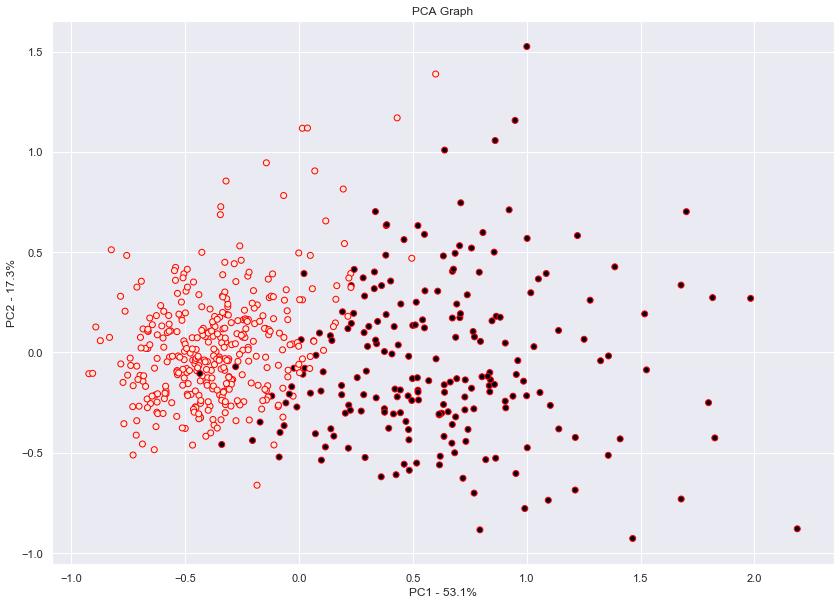

In [53]:
plt.figure(figsize = (14,10))
plt.scatter(pca_df.PC1, pca_df.PC2,c=cancer_dataset['target'],edgecolor='red')
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(percentage_variation[0]))
plt.ylabel('PC2 - {0}%'.format(percentage_variation[1]))

#this loop adds sample names to the graph
# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
# plt.show()

## Loading Scores

Loading scores for PC1 to determine which genes had the largest influence on separating the two clusters along the x-axis

In [37]:
loading_scores = pd.Series(pca.components_[0]) 
#loading scores in PC1, PC1 = 0

sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
# sort loading scores by abs value(magnitude)

top_10_index = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10_index])
#printing top 10 genes and their resp loading scores

27    0.371065
7     0.322475
6     0.301914
22    0.260708
20    0.259387
2     0.252550
26    0.244084
0     0.242676
5     0.240398
3     0.216495
dtype: float64


# Appylying PCA on StandardScaler 

In [38]:
pca = PCA(n_components=2)
#n_components = no.of required dimensions
#Humans can visualise upto 3D data

In [39]:
pca.fit(scaled_cancer)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [41]:
scaled_pca = pca.transform(scaled_cancer,)

In [42]:
scaled_pca.shape
#scaled_pca is now 2 columns wide

(569, 2)

In [43]:
scaled_pca.shape

(569, 2)

In [44]:
np.mean(scaled_pca)

-4.9950280194031645e-17

In [45]:
np.std(scaled_pca)

3.0800131733052565

In [46]:
scaled_pca_df = pd.DataFrame(scaled_pca,columns=['PC1','PC2'])
scaled_pca_df.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


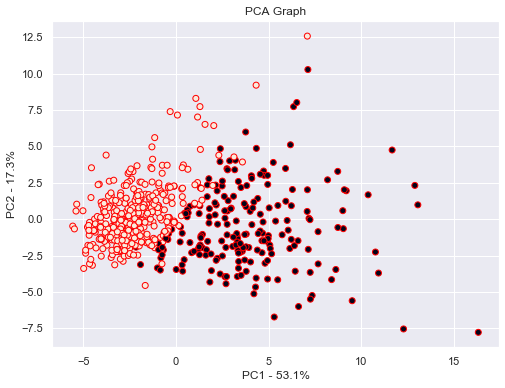

In [51]:
plt.figure(figsize=(8,6))

# plt.scatter(scaled_pca[:,0],scaled_pca[:,1],c=cancer_dataset['target'])
plt.scatter(scaled_pca_df.PC1,scaled_pca_df.PC2,c=cancer_dataset['target'],edgecolors=['red'])
plt.xlabel('PC1 - {0}%'.format(percentage_variation[0]))
plt.ylabel('PC2 - {0}%'.format(percentage_variation[1]))
plt.title('PCA Graph')
#this loop adds sample names to the graph
# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()